In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
index_train = np.where((train_labels == 2) | (train_labels == 6))
index_test = np.where((test_labels == 2) | (test_labels == 6) )
train_images_26 = train_images[index_train]
train_images_26 = train_images_26.reshape((len(train_images_26),train_images_26[1].size))
train_labels_26 = train_labels[index_train].astype('int')
test_images_26 = test_images[index_test]
test_images_26 = test_images_26.reshape((len(test_images_26),test_images_26[1].size))
test_labels_26 = test_labels[index_test].astype('int')
train_labels_26[ np.where(train_labels_26 == 2 )] = 0
train_labels_26[ np.where(train_labels_26 == 6 )] = 1
test_labels_26[ np.where(test_labels_26 == 2 )] = 0
test_labels_26[ np.where(test_labels_26 == 6 )] = 1
(train_images_26)= train_images_26[range(1000)].astype(np.float64)
(train_labels_26)= train_labels_26[range(1000)].astype(np.float64)

train_images_26_norm = train_images_26/255
test_images_26_norm = test_images_26/255


In [ ]:
train_images_26_w_dummy = np.insert(train_images_26,784,1,axis = 1)/255
test_images_26_w_dummy = np.insert(test_images_26,784,1,axis = 1)/255
thet = np.zeros(train_images_26_w_dummy.shape[1]).astype(np.float64)
alpha = 0.5
gamma = 0.5
count1= 0

In [ ]:
thet.shape

(785,)

In [ ]:
def h_theta(x,the):
  thet_x = -1*np.matmul(np.transpose(the),x)
  denom  = 1 + np.exp(thet_x)
  return np.float64(1/denom)

def gradient_loss_train(the):
  global count1
  
  sum = np.zeros(len(train_images_26_w_dummy[0]))
  for i in range(len(train_labels_26)):
    sum += (train_labels_26[i]-h_theta(train_images_26_w_dummy[i],the))*train_images_26_w_dummy[i]
  #print(sum)
  
  return sum

def training(the):
  global count1
  count1 = 0
  while np.linalg.norm(gradient_loss_train(the))>0.01:
    the += alpha*gradient_loss_train(the)
    count1 += 1
    #print(np.linalg.norm(gradient_loss_train(the)))
  return the

In [ ]:
theta_batch = training(thet)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
incorr = 0
for i in range(len(train_images_26_w_dummy)):
  pred = h_theta(train_images_26_w_dummy[i],theta_batch)#np.matmul(np.transpose(theta_batch),train_images_26_w_dummy[i])  
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=train_labels_26[i]: 
    incorr += 1 
print("training error",((incorr)/len(train_images_26_w_dummy)))

training error 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
incorr = 0
for i in range(len(test_images_26_w_dummy)):
  pred = h_theta(test_images_26_w_dummy[i],theta_batch)#np.matmul(np.transpose(theta_batch),test_images_26_w_dummy[i]) 
  #print(pred)
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=test_labels_26[i]: 
    incorr += 1 
print("testing error",((incorr)/len(test_images_26_w_dummy)))

testing error 0.030653266331658293


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


We can see that logistic regression is having a test error greater than all other models in first question except perceptron. It is very similar to perceptron algorithm.

In [ ]:
from sklearn.utils import shuffle
theta_stochastic = np.zeros(train_images_26_w_dummy.shape[1])
count2=0
flag = 0 
train_images_26_w_dummy_shuffle,train_labels_26_shuffle = shuffle(train_images_26_w_dummy,train_labels_26)
while flag==0:
  count2+=1
  for i in range(len(train_images_26_w_dummy)):
    theta_stochastic += alpha*(train_labels_26_shuffle[i]-h_theta(train_images_26_w_dummy_shuffle[i],theta_stochastic))*train_images_26_w_dummy_shuffle[i]
    if i %200 ==0:
      #print(np.linalg.norm(gradient_loss_train(thet)))
      if np.linalg.norm(gradient_loss_train(theta_stochastic))<0.01:
        flag=1
        break



In [ ]:
incorr = 0
for i in range(len(train_images_26_w_dummy)):
  pred = h_theta(train_images_26_w_dummy[i],theta_stochastic)#np.matmul(np.transpose(theta_stochastic),train_images_26_w_dummy[i])  
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=train_labels_26[i]: 
    incorr += 1 
print("training error",((incorr)/len(train_images_26_w_dummy)))

training error 0.0


In [ ]:
incorr = 0
for i in range(len(test_images_26_w_dummy)):
  pred = h_theta(test_images_26_w_dummy[i],theta_stochastic)#np.matmul(np.transpose(theta_stochastic),test_images_26_w_dummy[i]) 
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=test_labels_26[i]: 
    incorr += 1 
print("testing error",((incorr)/len(test_images_26_w_dummy)))

testing error 0.02613065326633166


We can see that the testing error has improved from perceptron algorithm at a faster rate.




In [ ]:
print("Batch gradient descent uses {} iterations".format(count1))
print("Stochastic gradient descent uses {} iterations".format(count2))

Batch gradient descent uses 152 iterations
Stochastic gradient descent uses 45 iterations


Stochastic gradient descent converges at a much faster rate and is more computationally efficent because in batch gradient descent , you have to calculate gradient for the entire training dataset.

In [ ]:
def batch_roc(gamma):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for i in range(len(test_images_26_w_dummy)):
    pred = h_theta(test_images_26_w_dummy[i],theta_batch)#np.matmul(np.transpose(theta_batch),test_images_26_w_dummy[i]) 
    if pred>=gamma:
      label=1
    else:
      label=0
    if label==1 and test_labels_26[i]==0: 
      fp += 1 
    elif label == 1 and test_labels_26[i]==1:
      tp += 1
    elif label == 0 and test_labels_26[i]==0:
      tn +=1
    elif label == 0 and test_labels_26[i]==1:
      fn +=1
  #print(tp,fp,tn,fn)  
  return (tp/(tp+fn)),(fp/(fp+tn))

In [ ]:
def stochastic_roc(gamma):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for i in range(len(test_images_26_w_dummy)):
    pred = h_theta(test_images_26_w_dummy[i],theta_stochastic)#np.matmul(np.transpose(theta_stochastic),test_images_26_w_dummy[i]) 
    if pred>=gamma:
      label=1
    else:
      label=0
    if label==1 and test_labels_26[i]==0: 
      fp += 1 
    elif label == 1 and test_labels_26[i]==1:
      tp += 1
    elif label == 0 and test_labels_26[i]==0:
      tn +=1
    elif label == 0 and test_labels_26[i]==1:
      fn +=1
  
  return (tp/(tp+fn)),(fp/(fp+tn))

In [ ]:
h_theta(test_images_26_w_dummy[2],theta_stochastic)

1.0

In [ ]:
batch_tpr =[]
batch_fpr = []
stoch_tpr =[]
stoch_fpr = []
for i in np.linspace(0,1,100):
  a,b =  batch_roc(i)
  batch_tpr.append(a)
  batch_fpr.append(b)
  a,b =  stochastic_roc(i)
  stoch_tpr.append(a)
  stoch_fpr.append(b)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


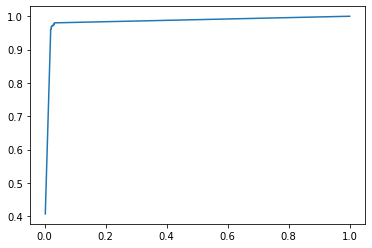

In [ ]:
plt.plot(stoch_fpr,stoch_tpr)

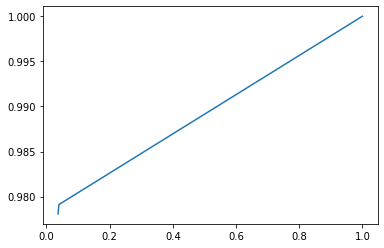

In [ ]:

plt.plot(batch_fpr,batch_tpr)

Stochastic has slightly more area under the curve . But both models seem to perform very well as they have the maximum possible area under the graph.

In [ ]:
def h_theta(x,the):
  thet_x = -1*np.matmul(np.transpose(the),x)
  denom  = 1 + np.exp(thet_x)
  return np.float64(1/denom)

def gradient_loss_train(the):
  global count1
  
  sum = np.zeros(len(train_images_26_w_dummy[0]))
  for i in range(len(train_labels_26)):
    sum += (train_labels_26[i]-h_theta(train_images_26_w_dummy[i],the))*train_images_26_w_dummy[i]
  #print(sum)
  
  return sum

def training(the):
  global count1
  count1 = 0
  while np.linalg.norm(gradient_loss_train(the))>0.00001:
    the += alpha*gradient_loss_train(the)
    count1 += 1
    #print(np.linalg.norm(gradient_loss_train(the)))
  return the

###2 .e) 0.00005 threshold

In [ ]:
theta_batch = training(thet)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
incorr = 0
for i in range(len(train_images_26_w_dummy)):
  pred = h_theta(train_images_26_w_dummy[i],theta_batch)#np.matmul(np.transpose(theta_batch),train_images_26_w_dummy[i])  
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=train_labels_26[i]: 
    incorr += 1 
print("training error",((incorr)/len(train_images_26_w_dummy)))

training error 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
incorr = 0
for i in range(len(test_images_26_w_dummy)):
  pred = h_theta(test_images_26_w_dummy[i],theta_batch)#np.matmul(np.transpose(theta_batch),test_images_26_w_dummy[i]) 
  #print(pred)
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=test_labels_26[i]: 
    incorr += 1 
print("testing error",((incorr)/len(test_images_26_w_dummy)))

testing error 0.030653266331658293


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
np.linalg.norm(gradient_loss_train(theta_batch))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


9.999927425701095e-06

In [ ]:
print("Number of iteration for 0.00001 threshold in batch-gradient descent is {}".format(count1))

Number of iteration for 0.00001 threshold in batch-gradient descent is 29542


In [ ]:
from sklearn.utils import shuffle
theta_stochastic = np.zeros(train_images_26_w_dummy.shape[1])
count2=0
flag = 0 
train_images_26_w_dummy_shuffle,train_labels_26_shuffle = shuffle(train_images_26_w_dummy,train_labels_26)
while flag==0:
  count2+=1
  for i in range(len(train_images_26_w_dummy)):
    theta_stochastic += alpha*(train_labels_26_shuffle[i]-h_theta(train_images_26_w_dummy_shuffle[i],theta_stochastic))*train_images_26_w_dummy_shuffle[i]
    if i %200 ==0:
      print(np.linalg.norm(gradient_loss_train(theta_stochastic)))
      if np.linalg.norm(gradient_loss_train(theta_stochastic))<0.00001:
        flag=1
        break



Streaming output truncated to the last 5000 lines.
0.0001051621772610422
0.00010516090725338172
0.00010515990670047294
0.0001051595910252728
0.0001051594553782875
0.000105158565586783
0.0001051572956702582
0.00010515629518785957
0.00010515597953590653
0.00010515584389579173
0.00010515495416742299
0.00010515368434264984
0.0001051526839296149
0.00010515236830281628
0.00010515223266792923
0.00010515134300541418
0.00010515007327146921
0.00010514907292841109
0.00010514875732459219
0.00010514862169643303
0.00010514773209759103
0.00010514646245563825
0.00010514546218348057
0.00010514514660334829
0.00010514501097991141
0.00010514412144618591
0.00010514285189516134
0.00010514185169273288
0.00010514153613690035
0.00010514140052023064
0.00010514051105047982
0.00010513924159157691
0.0001051382414578457
0.00010513792592600115
0.00010513779031509964
0.00010513690091072154
0.00010513563154215561
0.00010513463147935505
0.00010513431597106737
0.00010513418036623552
0.00010513329102596254
0.000105132021

KeyboardInterrupt: ignored

In [ ]:
incorr = 0
for i in range(len(train_images_26_w_dummy)):
  pred = h_theta(train_images_26_w_dummy[i],theta_stochastic)#np.matmul(np.transpose(theta_stochastic),train_images_26_w_dummy[i])  
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=train_labels_26[i]: 
    incorr += 1 
print("training error",((incorr)/len(train_images_26_w_dummy)))

training error 0.0


In [ ]:
incorr = 0
for i in range(len(test_images_26_w_dummy)):
  pred = h_theta(test_images_26_w_dummy[i],theta_stochastic)#np.matmul(np.transpose(theta_stochastic),test_images_26_w_dummy[i]) 
  if pred>=gamma:
    label=1
  else:
    label=0
  if label!=test_labels_26[i]: 
    incorr += 1 
print("testing error",((incorr)/len(test_images_26_w_dummy)))

testing error 0.02613065326633166


27077